In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

F:\pranjal\Python_anaconda\envs\py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
F:\pranjal\Python_anaconda\envs\py35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
mnist =  pd.read_csv(r"C:\Users\Pranjal Mishra\Documents\MNIST_Train.csv")

In [3]:
print(mnist.head()) ### 1st column label is my Y variable 
#mnist.iloc[4:10,]
mnist.shape

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

(42000, 785)

In [5]:
### below few lines are just to show case more about the mnist data its not actuall part of the code

sen_col = mnist.iloc[1]  ## selecting the 1st row and all column

In [6]:
sen_col =  sen_col.iloc[ 1:786 ,]  ### droping the 1st column as it was non numeric



In [7]:
len(sen_col )   ## get the length as 784

784

In [8]:
abc  = np.array(sen_col ) ## convert into array so that we can reshape

In [9]:
abc = abc.reshape(28,28)  ### 28 * 28  = 784

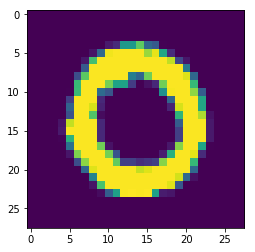

In [10]:
plt.imshow(abc)

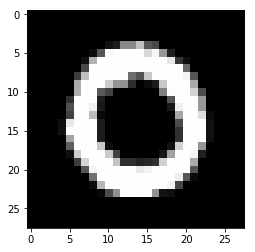

In [10]:
plt.imshow(abc ,  cmap =  'gist_gray') ### if you want to see in the grey scale 

In [11]:
### now creating the model

In [12]:


mnist =  pd.read_csv(r"C:\Users\Pranjal Mishra\Documents\MNIST_Train.csv")
mnist.shape

(42000, 785)

In [13]:
mnist_x = mnist.iloc[ : , 1:786]

mnist_y = mnist.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split

mnist_x_train , mnist_x_test , mnist_y_train , mnist_y_test =  train_test_split(mnist_x , mnist_y , 
                                                                                test_size = .2 , random_state = 101)

print(mnist_x_train.shape)
print(mnist_x_test.shape)
print("-----")
print(mnist_y_train.shape)
print(mnist_y_test.shape)

(33600, 784)
(8400, 784)
-----
(33600,)
(8400,)


In [21]:
mnist_x_train  = np.array(mnist_x_train)
 
### important as we convert 784 in 28,28 cell
for i in range(len(mnist_x_train)):
    mnist_x_train[i,].reshape(28,28)
    

In [22]:
mnist_x_test  = np.array(mnist_x_test)

for i in range(len(mnist_x_test)):
    mnist_x_test[i,].reshape(28,28)


In [23]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)  ### to normalize the data, if we do not normalize then the accuracy is very less
mnist_x_test =  tf.keras.utils.normalize(mnist_x_test )  ### to normalize the data, if we do not normalize then the accuracy is very less


In [36]:
model = tf.keras.models.Sequential()     ## neural network is initiliazed
#model.add(tf.keras.layers.Flatten())    #  its not mandatory as we have not used CNN
model.add(tf.keras.layers.Dense(128 ,  activation = tf.nn.relu))  ## 1st layer
model.add(tf.keras.layers.Dense(128 ,  activation = tf.nn.relu))  ## 2nd layer
model.add(tf.keras.layers.Dense(128 ,  activation = tf.nn.relu))  ## 3rd layer  
model.add(tf.keras.layers.Dense(10 ,  activation = tf.nn.softmax))  ## last layer so softmax is must as we have more than categories
model.compile(optimizer = 'adam'  , loss = 'sparse_categorical_crossentropy' , metric = ['accuracy'])

## Sequential is used to initiliaze are neural network. Neural network are also sequence of layers
#The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption
#for deep learning applications in computer vision and natural language processing.
# dense indicates your fully connected layer
# 128 is number of neutrons in each layer 
#  metric = ['accuracy'] , performance metric
# model.compile  ...complies the model
## in flattening we convert all the pooled features that we created through convolutional and max poling into large vector...
#      which becomes the I/P for the fully connected layer

### sparse_categorical_crossentropy is a loss function, used to measure the dissimilarity between... 
#  ..the distribution of observed class labels and the predicted probabilities of class membership.

In [37]:
mnist_y_train  = np.array(mnist_y_train)  ### very imp, other wise we get error  while model fit.


model.fit(mnist_x_train  , mnist_y_train , epochs = 3)

Epoch 1/3
33600/33600 [==============================] - 6s 191us/step - loss: 0.3915
Epoch 2/3
33600/33600 [==============================] - 6s 172us/step - loss: 0.1536
Epoch 3/3
33600/33600 [==============================] - 6s 169us/step - loss: 0.1050


In [38]:
from sklearn.metrics import confusion_matrix , classification_report

pred1  = model.predict_classes(mnist_x_test)

tab1  = confusion_matrix(pred1 , mnist_y_test)
pred1  = model.predict_classes(mnist_x_test)
tab1



array([[754,   0,   5,   2,   0,   1,   0,   0,   0,   2],
       [  0, 939,   6,   4,   0,   1,   2,   2,   3,   2],
       [  1,   1, 808,   4,   1,   0,   0,   6,   2,   0],
       [  0,   2,  10, 828,   0,  14,   0,   2,  13,  15],
       [  0,   1,   9,   1, 806,   1,   2,  13,   4,  25],
       [  7,   1,   1,   4,   0, 705,   4,   2,   5,   1],
       [ 16,   0,   6,   2,   4,   6, 813,   0,   3,   1],
       [  2,   1,   4,   3,   1,   0,   0, 842,   2,  15],
       [  5,   3,  10,   5,   1,   3,   3,   0, 785,   6],
       [  4,   0,   0,   6,   5,   2,   0,   6,   3, 810]], dtype=int64)

In [35]:
tab1.diagonal().sum()  / tab1.sum()

0.9653571428571428

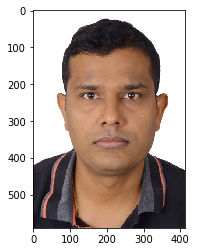

In [28]:
#### to read the image 

import matplotlib.image as img
pranjal =  img.imread(r"C:\Users\Pranjal Mishra\Desktop\05.jpg")
plt.imshow(pranjal)   ##3 image will be shown


In [31]:
pranjal  ## shows the number for the pic cells, like the way in mnist

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 21,  18,  27],
        [ 24,  21,  30],
        [ 24,  21,  30],
        ...,
        [ 29,  28,  34],
        [ 29,  26,  35],
        [ 30,  27,  36]],

       [[ 22,  19,  26],
        [ 23,  20,  27],
        [ 24,  21,  28],
        ...,
        [ 30,  29,  35],
        [ 31,  30,  38],
        [ 28,  27,  35]],

       [[ 20,  17,  24],
        [ 22,  19,  26],
        [ 25,  22,  31],
        ...,
        [ 30,  29,  35],
        [ 33,  30,  39],
        [ 30,  27,  38]]